# **Trustworthy Machine Learning**
### Winter Semester 2022-2023
### Lecturer: Seong Joon Oh
### **Exercise 0 -- Preliminary Materials**

---

Student name: Balint Mucsanyi

Student email: balint.mucsanyi@student.uni-tuebingen.de

---

#### **Submission deadline: 27/10/2022 at 23:59.**

Welcome to the Trustworthy Machine Learning course! TML is an advanced course that assumes some basic knowledge of machine learning and deep learning. This zeroth exercise will test your prerequisite knowledge and skills. 

#### **Policy for the zeroth exercise**
This exercise is the **only individual exercise** in our course. The rest of the exercises in our course will be submitted and graded per group. The purpose of this zeroth exercise is to ensure that individual members of each group are sufficiently committed. As such, **we will enrol only the students who submit the zeroth exercise**. We will only accept solutions with the **minimal passing grade 30/100 points** to make sure that students do not submit empty work. The grade for the zeroth exercise **does not count towards the final grade**. The main purpose of this exercise is to selectively enrol motivated students and for you to evaluate your own readiness for the course. 


####**Submission**
Follow the below four steps.

(1) Copy this colab file to your local gdrive;

`File > Save a copy in Drive`

(2) Work on the solution on your local copy;

(3) Pin the version for submission in history;

`Click on "All changes saved" or "Last saved at XX:XX AM/PM" next to the drop-down menus at the top > Select version to submit > Click on three vertical dots (vertical ellipsis) > Rename > Write "Submission" `

(4) Share your local colab with `stai.there@gmail.com` before the deadline.

`Click on "Share" at the top-right corner > Put stai.there@gmail.com in "Add people and groups" > Give the "Viewer" right and tick on "Notify people" > Click send.`

Note that we are able to see the edit history with time stamps, so please ensure that you stop working on your notebook before the deadline.

## **0.1 Multivariate Calculus (10 + 10 + 5 = 25 points)**

Let $f\in\mathbb{R}^C$ be a vector with dimension $C$, equal to the number of classes. Let $Y\in\{1,\cdots,C\}$ be the corresponding ground-truth label. We define the softmax-cross-entropy loss as follows:
\begin{equation}
    \mathcal{L} = -\sum_{j=1}^C \delta_{jY} \log \frac{\exp{f_j}}{\sum_k \exp{f_k}}
\end{equation}
where $\delta_{ab}$ is the Kronecker Delta:
\begin{equation}
    \delta_{ab} = 
    \begin{cases}
        1\quad \text{if $a=b$;} \\
        0\quad \text{otherwise;}
    \end{cases}
\end{equation}

(a) Compute the gradient $\frac{\partial \mathcal{L}}{\partial f_c}$ for $c\in\{1,\cdots,C\}$. It may be helpful to introduce the substitution $p_j:=\frac{\exp{f_j}}{\sum_k \exp{f_k}}$. **(10 points)**

$$
\begin{align}
\mathcal{L} &= -\sum_{j = 1}^C \delta_{jY}\log \frac{\exp f_j}{\sum_{k=1}^C \exp f_k}\\
&= -\log \frac{\exp f_Y}{\sum_{k=1}^C \exp f_k}\\
&= -\left(\log \exp f_Y - \log \sum_{k=1}^C \exp f_k\right)\\
&= \log \sum_{k=1}^C \exp f_k - f_Y
\end{align}
$$
$\forall c \in \{1, \dots, C\}:$
$$
\begin{align}
\frac{\partial \mathcal{L}}{\partial f_c} &= \frac{\partial}{\partial f_c}\left(\log \sum_{k=1}^C \exp f_k - f_Y\right)\\
&= \frac{1}{\sum_{k=1}^C \exp f_k} \cdot \sum_{k=1}^C \exp f_k \delta_{kc} - \delta_{Yc}\\
&= \frac{\exp f_c}{\sum_{k=1}^C \exp f_k} - \delta_{Yc}\\
&= \text{softmax}(f)_c - \delta_{Yc}.
\end{align}
$$

Let $\{(X_i, Y_i)\}_{i=1}^N$ be data samples with $X\in\mathbb{R}^D$ (e.g. images) and $Y\in\{1,\cdots,C\}$ (e.g. labels). Let  $f:\mathbb{R}^D\rightarrow\mathbb{R}^C$ be a two-layer neural network of the following architecture
\begin{equation}
    f(X;W,V) = V\cdot \sigma(W\cdot X)
\end{equation}
where $W\in\mathbb{R}^{H\times D}$ maps $X$ to a hidden space $\mathbb{R}^H$, $\sigma$ is the element-wise ReLU activation function $\sigma(x)=\max\{0,x\}$, and $V\in\mathbb{R}^{C\times H}$ maps a hidden representation to the output space $\mathbb{R}^C$. Now, plug in our two-layer neural network to the $f$ in the softmax-cross-entropy loss:
\begin{equation}
    \mathcal{L}(W,V) = -\sum_{j=1}^C \delta_{jY} \log \frac{\exp{f_j(X;W,V)}}{\sum_k \exp{f_k(X;W,V)}}
\end{equation}

(b) Compute the gradient $\frac{\partial \mathcal{L}}{\partial V_{ch}}$ for $c\in\{1,\cdots,C\}$ and $h\in\{1,\cdots,H\}$ using the answer to (a) and chain rule. **(10 points)**

$$
\begin{align}
\mathcal{L}(W, V) &= -\sum_{j=1}^C \delta_{jY}\log \frac{\exp f_j(X; W, V)}{\sum_{k=1}^C \exp f_k(X; W, V)}\\
&\overset{(a)}{=} \log \sum_{k=1}^C \exp f_k(X; W, V) - f_Y(X; W, V)
\end{align}
$$
$\forall c \in \{1, \dots, C\}, h \in \{1, \dots, H\}:$
$$\frac{\partial \mathcal{L}}{\partial V_{ch}} = \sum_{k=1}^C \frac{\partial \mathcal{L}}{\partial f_k}\cdot \frac{\partial f_k}{\partial V_{ch}}$$
Here we have
$$
\begin{align}
\frac{\partial \mathcal{L}}{\partial f_k} \overset{(a)}{=} \frac{\exp f_k}{\sum_{q=1}^C \exp f_q} - \delta_{Yk}
\end{align}
$$
and
$$
\begin{align}
\frac{\partial f_k}{\partial V_{ch}} &= \frac{\partial}{\partial V_{ch}}\left(V\cdot \sigma(W \cdot X)\right)_k\\
&= \frac{\partial}{\partial V_{ch}}\left(\sum_{l=1}^H V_{kl}\sigma(W\cdot X)_l\right)\\
&= \sum_{l=1}^H \delta_{kc}\delta_{lh}\sigma(W \cdot X)_l\\
&= \delta_{kc}\sigma(W \cdot X)_h
\end{align}
$$
thus,
$$
\begin{align}
\frac{\partial \mathcal{L}}{\partial V_{ch}} &= \sum_{k=1}^C \left(\frac{\exp f_k}{\sum_{q=1}^C \exp f_q} - \delta_{Yk}\right)\delta_{kc}\sigma(W \cdot X)_h\\
&= \left(\frac{\exp f_c}{\sum_{q=1}^C \exp f_q} - \delta_{Yc}\right)\sigma(W\cdot X)_h.
\end{align}
$$

(c) Compute the gradient $\frac{\partial \mathcal{L}}{\partial W_{hd}}$ for $h\in\{1,\cdots,H\}$ and $d\in\{1,\cdots,D\}$ using the answer to (b) and chain rule. **(5 points)**

$\forall h \in \{1, \dots, H\}, d \in \{1, \dots, D\}:$
$$\frac{\partial \mathcal{L}}{\partial W_{hd}} = \sum_{k=1}^C \frac{\partial \mathcal{L}}{\partial f_k}\cdot \frac{\partial f_k}{\partial W_{hd}}$$
Here we have
$$
\begin{align}
\frac{\partial \mathcal{L}}{\partial f_k} \overset{(a)}{=} \frac{\exp f_k}{\sum_{q=1}^C \exp f_q} - \delta_{Yk}
\end{align}
$$
and
$$
\begin{align}
\frac{\partial f_k}{\partial W_{hd}} &= \frac{\partial}{\partial W_{hd}}\left(V\cdot \sigma(W \cdot X)\right)_k\\
&= \frac{\partial}{\partial W_{hd}} \left(\sum_{l=1}^H V_{kl} \sigma(W\cdot X)_l\right)\\
&= \sum_{l=1}^H V_{kl} \frac{\partial \sigma(W \cdot X)_l}{\partial W_{hd}}\\
&= \sum_{l=1}^H V_{kl} \frac{\partial}{\partial W_{hd}}\max\left(0, (W\cdot X)_l\right)\\
&= \sum_{l=1}^H V_{kl} \frac{\partial \max\left(0, (W\cdot X)_l\right)}{\partial (W\cdot X)_l} \cdot \frac{\partial \sum_{p=1}^D W_{lp}X_p}{\partial W_{hd}}\\
&= \sum_{l=1}^H V_{kl}\cdot \mathbf{I}\left[(W \cdot X)_l > 0\right] \cdot \sum_{p=1}^D \delta_{lh}\delta_{pd}X_p\\
&= V_{kh}\cdot \mathbf{I}\left[(W\cdot X)_h > 0\right] \cdot X_d
\end{align}
$$
thus,
$$
\begin{align}
\frac{\partial \mathcal{L}}{\partial W_{hd}} &= \sum_{k=1}^C \left(\frac{\exp f_k}{\sum_{q=1}^C \exp f_q} - \delta_{Yk}\right) \cdot V_{kh} \cdot \mathbf{I}\left[(W\cdot X)_h > 0\right] \cdot X_d\\
&= \mathbf{I}\left[(W\cdot X)_h > 0\right] \cdot X_d \cdot \sum_{k=1}^C \left(\frac{\exp f_k}{\sum_{q=1}^C \exp f_q} - \delta_{Yk}\right) \cdot V_{kh}.
\end{align}
$$
Above, $\mathbf{I}$ denotes the indicator function.

## **0.2 Generalisation (5 + 5 + 5 + 5 + 5 = 25 points)**


(a) What is the role of training, validation, and test splits of a dataset for machine learning? **(5 points)**



*   **Train split**: We use it to train (optimize) model parameters for a fixed hyperparameter set and method. During training, we aim to minimize the training loss (and optionally, the regularization term), typically with a variant of gradient descent.
*   **Validation/dev split**: We use it to choose performant hyperparameters and design choices for a fixed method, using e.g. Bayesian optimization or grid search. This already simulates deployment, as these samples are not seen by the model during training. The objective being monitored is the validation loss to measure generalization performance.
*   **Test split**: We use it to simulate the actual deployment scenario. The choice of the overall methodology and approach can be made based on test performance. The objective here is the test loss which also measures generalization performance.



Consider an image classification task, where $X\in\mathbb{R}^D$ is an input image and $Y\in\{1,\cdots,C\}$ is the corresponding label following $p(X,Y)$. Let $\mathcal{D}^\text{tr}=\{(X_i,Y_i)\}_{i=1}^N$ and $\mathcal{D}^\text{te}=\{(X_i,Y_i)\}_{i=N+1}^{N+M}$ be training and test samples, respectively, that are IID-sampled from $p(X,Y)$. Let $f_\theta$ be a model trained on $\mathcal{D}^\text{tr}$. Write $f_\theta(c,X)\in[0,1]$ for the predicted probability that image $X$ belongs to class $c$.

(b) Write down the equations for the training- and test-set accuracies of $f_\theta$. **(5 points)**

Train set accuracy of $f_\theta$:
$$\text{acc}^{\text{tr}} = \frac{1}{N}\sum_{i=1}^N \delta_{Y_i,\ \underset{c \in \{1, \dots, C\}}{\arg\max} f_\theta(c, X_i)}$$
Test set accuracy of $f_\theta$:
$$\text{acc}^{\text{te}} = \frac{1}{M}\sum_{i=N+1}^{N+M} \delta_{Y_i,\ \underset{c \in \{1, \dots, C\}}{\arg\max} f_\theta(c, X_i)}$$

(c) Explain what it means to say that $f_\theta$ "generalises well" and introduce a quantitative metric for this. **(5 points)**

$f_\theta$ generalizes well if it adapts well to (i.e., achieves low loss on) previously unseen data samples. Typically, generalization refers to the model's performance on new samples from the same distribution as the train set, but OOD generalization measures generalization performance on samples outside the train set distribution.

A quantitative metric for generalization performance is the **(true) risk** of the classifier over $p(X, Y)$:
$$R(f_\theta) = \mathbb{E}_{p(X, Y)}[\ell(Y, f_\theta(X))],$$
where $p(X, Y)$ is the distribution over which we want to measure generalization performance and $\ell$ is our loss function of choice. Here,
$$f_\theta(X) := \begin{pmatrix}f_\theta(1, X)\\ f_\theta(2, X)\\ \vdots\\ f_\theta(C, X)\end{pmatrix}.$$
For classification, it can e.g. be the cross-entropy loss from above: $\ell(Y, f_\theta(X)) = -\sum_{c = 1}^C \delta_{cY}\log f_\theta(c, X) = -\log f_\theta(Y, X)$ (here we do not apply the softmax function as it is already applied according to the task description: each entry of $f_\theta(X)$ is normalized to [0, 1]). As this expectation is typically intractable and $p$ is usually not known closed-form, we can approximate the true risk by the **empirical risk on the test set**:
$$R_M(f_\theta) = \frac{1}{M}\sum_{i=N+1}^{N+M}\ell(Y_i, f_\theta(X_i)),$$
where, as above, $\mathcal{D}^\text{te}=\{(X_i,Y_i)\}_{i=N+1}^{N+M}$ are test samples that are IID-sampled from $p(X,Y)$.

(d) Explain the concept of overfitting and underfitting. **(5 points)**


**Underfitting** happens when our model of choice is not powerful enough to represent the true relationship between input and output. This corresponds to high bias but low variance in the bias-variance trade-off. Both the train and test errors are high.

**Overfitting** happens when our model is powerful enough to represent the true relationship between input and output but it is also fit to noise in the train set that harms its generalization performance. This corresponds to high variance but low bias in the bias-variance trade-off. The train error is low but the test error is high. Recently it has also been observed that for heavily over-parameterized models **benign overfitting** can also take place, where the model is fit below the noise level (e.g. it interpolates, 0 train error) but it still manages to generalize well (also low test error).

(e) Explain the respective solutions for overfitting and underfitting. **(5 points)**

**Underfitting**: We can increase the model capacity (e.g. add more layers, neurons or increase $C$ in an SVM) in order to fit training samples better.

**Overfitting**: We can employ regularization (e.g. use L2- or L1-regularization, dropout, or decrease $C$ in an SVM) to constrain the model from fitting noise and help it generalize better.

## **0.3 MNIST Case-study (15 + 15 + 10 + 10 = 50 points)**

*This exercise is based on the public code at https://colab.research.google.com/github/skorch-dev/skorch/blob/master/notebooks/MNIST.ipynb (BSD 3-Clause License)*.

### **Note**
I changed the code below at two points, both of which I believe to be mistakes:
1.   In the Solver class,``self.model.eval()`` was not called at the evaluation step. Consequently, the dropout layer was not turned off during inference, degrading the models' performance.
2.   Softmax was applied in both forward functions. This is not needed, as we use the SoftmaxCrossEntropyLoss module as our loss, which includes the application of softmax.

I also added comments to the respective changes.



In [ ]:
!pip install torch scikit-learn==0.20.* skorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
import logging

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):


### Loading Data

The following code downloads MNIST. It takes 2-3 minutes.

In [ ]:
mnist = fetch_openml('mnist_784', cache=True)

In [ ]:
mnist.data.shape

(70000, 784)

### Preprocessing Data

Each image of the MNIST dataset is encoded in a 784 dimensional vector, representing a 28 x 28 pixel image. Each pixel has a value between 0 and 255, corresponding to the grey-value of a pixel.<br />
The above ``fetch_openml`` method to load MNIST returns ```data``` and ```target``` as ```uint8``` which we convert to ```float32``` and ```int64``` respectively.

In [ ]:
X = mnist.data.astype('float32')
y = mnist.target.astype('int64')

(*****) To avoid big weights that deal with the pixel values from between [0, 255], we scale `X` down. A commonly used range is [0, 1].

In [ ]:
X /= 255.0

In [ ]:
X.min(), X.max()

(0.0, 1.0)

### Preparing Train-Val-Test Splits (15 points)

Let's split the given MNIST data (70000 samples) into 3 partitions: train, val, and test. Complete the function `train_test_split` **(15 points)**.

In [ ]:
def train_test_split(X, y, val_size, test_size, random_seed=None):
  """
  Given a labelled dataset in memory, return two disjoint partitions, train and test, randomly split according to the given test_size.
  For replicability, make sure that the same random_seed returns the same split of the dataset.

  Args:
    X: numpy.ndarray of shape (N, D) and type np.float32. N is the number of sample instances and D is the dimensionality of input features.
    y: numpy.ndarray of shape (N,) and type np.int64.
    val_size: float value between 0 and 1. Controls the ratio of val samples.
    test_size: float value between 0 and 1. Controls the ratio of test samples.
    random_seed: int or None. If it is int, set the random seed to ensure replicability. If it is None, do not set the random seed.

  Returns:
    dict of
      X_train: numpy.ndarray of shape (N - L - M, D) and type np.float32.
      y_train: numpy.ndarray of shape (N - L - M,) and type np.int64.
      X_val: numpy.ndarray of shape (L, D) and type np.float32. L = int(N * val_size).
      y_val: numpy.ndarray of shape (L,) and type np.int64.
      X_test: numpy.ndarray of shape (M, D) and type np.float32. M = int(N * test_size).
      y_test: numpy.ndarray of shape (M,) and type np.int64.
  """
  #### >>>> PUT YOUR SOLUTION HERE <<<< 15 points
  rng = np.random.default_rng(seed=random_seed)
  data = np.concatenate([X, y[:, np.newaxis]], axis=1)
  rng.shuffle(data, axis=0)
  X_shuffled = data[:, :-1].astype(np.float32)
  y_shuffled = data[:, -1].astype(np.int64)

  N = X_shuffled.shape[0]
  L = int(N * val_size)
  M = int(N * test_size)
  
  X_train = X_shuffled[:N-L-M, :]
  y_train = y_shuffled[:N-L-M]

  X_val = X_shuffled[N-L-M:N-M, :]
  y_val = y_shuffled[N-L-M:N-M]

  X_test = X_shuffled[N-M:, :]
  y_test = y_shuffled[N-M:]
  #### >>>> END OF YOUR SOLUTION <<<<
  return {
      "X_train": X_train,
      "y_train": y_train,
      "X_val": X_val,
      "y_val": y_val,
      "X_test": X_test,
      "y_test": y_test,
  }

Define test functions.

In [ ]:
def compute_diff_matrix(mat1, mat2, max_samples):
  """
  Compute the pairwise L1 distance among the feature vectors in mat1 and mat2.
  Args:
    mat1: array of shape (N, D) where D is the feature dimension.
    mat2: array of shape (M, D)
    max_samples: for the interest of RAM usage, we may restrict the max number of samples
  Returns:
    dist_mat: array of shape (N, M) where N <- min(max_samples, N) and M <- min(max_samples, M)
  """
  num_samples1 = min(max_samples, len(mat1))
  num_samples2 = min(max_samples, len(mat2))
  diff_matrix = np.abs(
      np.expand_dims(mat1[:num_samples1], axis=0)  # (1, N, D)
    - np.expand_dims(mat2[:num_samples2], axis=1)  # (M, 1, D)
  ).sum(axis=2)
  return diff_matrix


def train_test_split_test(X, y):
  print(f"Checking train-val-test split sizes.")
  data_splits = train_test_split(X, y, val_size=0.2, test_size=0.5, random_seed=None)
  print(len(data_splits["X_train"]))
  assert len(data_splits["X_train"]) == 21000
  assert len(data_splits["X_val"]) == 14000
  assert len(data_splits["X_test"]) == 35000
  assert len(data_splits["y_train"]) == 21000
  assert len(data_splits["y_val"]) == 14000
  assert len(data_splits["y_test"]) == 35000
  data_splits = train_test_split(X, y, val_size=0.1, test_size=0.8, random_seed=None)
  assert len(data_splits["X_train"]) == 7000
  assert len(data_splits["X_val"]) == 7000
  assert len(data_splits["X_test"]) == 56000
  assert len(data_splits["y_train"]) == 7000
  assert len(data_splits["y_val"]) == 7000
  assert len(data_splits["y_test"]) == 56000

  print(f"Checking train-test split purity.")
  diff_matrix_tr_te = compute_diff_matrix(mat1=data_splits["X_train"],
                                          mat2=data_splits["X_test"],
                                          max_samples=1000)
  assert diff_matrix_tr_te.min() > 0
  diff_matrix_tr_val = compute_diff_matrix(mat1=data_splits["X_train"],
                                           mat2=data_splits["X_val"],
                                           max_samples=1000)
  assert diff_matrix_tr_val.min() > 0
  diff_matrix_te_val = compute_diff_matrix(mat1=data_splits["X_test"],
                                           mat2=data_splits["X_val"],
                                           max_samples=1000)
  assert diff_matrix_te_val.min() > 0

  print(f"Checking whether random seed is working.")
  data_splits1 = train_test_split(X, y, val_size=0.1, test_size=0.3, random_seed=65)
  data_splits2 = train_test_split(X, y, val_size=0.1, test_size=0.3, random_seed=65)
  data_splits3 = train_test_split(X, y, val_size=0.1, test_size=0.3, random_seed=66)
  data_splits4 = train_test_split(X, y, val_size=0.1, test_size=0.3, random_seed=None)
  data_splits5 = train_test_split(X, y, val_size=0.1, test_size=0.3, random_seed=None)
  
  assert (data_splits1["X_train"]==data_splits2["X_train"]).all()
  assert (data_splits2["X_train"]!=data_splits3["X_train"]).any()
  assert (data_splits4["X_train"]!=data_splits5["X_train"]).any()

Test your solution by running the test function below.

In [ ]:
data_splits = train_test_split(X, y, val_size=0.1, test_size=0.1, random_seed=42)

In [ ]:
for key in data_splits:
  print(f"{key} shape: {data_splits[key].shape}")

X_train shape: (56000, 784)
y_train shape: (56000,)
X_val shape: (7000, 784)
y_val shape: (7000,)
X_test shape: (7000, 784)
y_test shape: (7000,)


In [ ]:
def plot_example(X, y, num_samples=10):
    """Plot the first N images and their labels in a row."""
    for i, (img, y) in enumerate(
        zip(X[:num_samples].reshape(num_samples, 28, 28), y[:num_samples])
    ):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        plt.title(y)

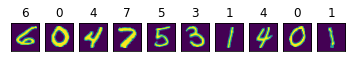

In [ ]:
plot_example(data_splits["X_train"], data_splits["y_train"])

### Define an MLP Model
Simple, fully connected neural network with one hidden layer. Input layer has 784 dimensions (28x28), hidden layer has 98 (= 784 / 8) and output layer 10 neurons, representing digits 0 - 9.

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
device

'cuda'

In [ ]:
class MLP(nn.Module):
    def __init__(
            self,
            input_dim,
            hidden_dim,
            output_dim,
            dropout=0.5,
    ):
        super(MLP, self).__init__()
        print(f"input_dim={input_dim}, hidden_dim={hidden_dim}, output_dim={output_dim}")

        self.dropout = nn.Dropout(dropout)

        self.hidden = nn.Linear(input_dim, hidden_dim)
        self.output = nn.Linear(hidden_dim, output_dim)

    def forward(self, X, **kwargs):
        X = F.relu(self.hidden(X))
        X = self.dropout(X)
        # The softmax activation is not needed, as it is applied in the loss
        X = self.output(X)
        return X

### Define the Loss Function (15 points)

We train the model with the softmax-cross-entropy loss. The first part of the function is already there.
```
outputs = outputs - outputs.max(1, keepdim=True)[0]
```
This part ensures the numerical stability of the softmax operation, which is translation invariant.
```
labels_onehot = F.one_hot(labels, num_classes=10)
```
This part turns the integer labels into one-hot vectors.

Complete the loss function **(15 points)**.

In [ ]:
class SoftmaxCrossEntropyLoss(nn.Module):
  def forward(self, outputs, labels):
    """
    Compute softmax cross-entropy loss.
    Args:
      outputs: torch.Tensor of shape (B, C) and type float32.
      labels: torch.Tensor of shape (B,) and type long.
    Returns:
      loss: torch.Tensor of scalar shape and type float32.
    """
    outputs = outputs - outputs.max(1, keepdim=True)[0]
    labels_onehot = F.one_hot(labels, num_classes=10)  # shape (B, C) type bool

    #### >>>> PUT YOUR SOLUTION HERE <<<< 15 points
    loss = (outputs.exp().sum(dim=1).log() - (outputs * labels_onehot).sum(dim=1)).mean()
    #### >>>> END OF YOUR SOLUTION <<<<
    return loss

### Define Solver

A programming framework that is often used to manage model training, inference, and evaluation is the Solver object. This is advantageous because such activities around a model share common data and methods: 
- Model (torch.nn.Module)
- Dataset (torch.utils.data.Dataset)

We have defined the Solver class for you. You may find this framework useful for managing ML code later on.

In [ ]:
class Solver:
  def __init__(self, data_splits, model, criterion, config):
    self.config = config
    self.model = model
    self.criterion = criterion
    self.optimizer = optim.SGD(self.model.parameters(),
                               lr=config["lr"],
                               momentum=config["momentum"])
    self.data_splits = data_splits

  def load_dataloader(self, split, role):
    if role == "eval":
      batch_size = config["eval_batch_size"]
      shuffle = True
    elif role == "train":
      batch_size = config["batch_size"]
      shuffle = False
    else:
      raise ValueError(f"Unknown role name {role}.")
    
    return torch.utils.data.DataLoader(
      torch.utils.data.TensorDataset(
          torch.from_numpy(self.data_splits[f"X_{split}"]),
          torch.from_numpy(self.data_splits[f"y_{split}"])
      ), 
      batch_size=batch_size,
      shuffle=shuffle,
      num_workers=config["num_workers"]
    )

  def fit_one_batch(self, inputs, labels):
    self.optimizer.zero_grad()
    outputs = self.model(inputs)
    loss = self.criterion(outputs, labels)
    loss.backward()
    self.optimizer.step()
    return loss

  def fit_one_epoch(self, epoch_idx):
    self.model.train()  # Needed for activation of dropout
    loss_epoch = 0.0
    dataloader = self.load_dataloader(split="train", role="train")
    for batch_idx, (inputs, labels) in enumerate(dataloader):
      loss = self.fit_one_batch(inputs, labels)
      loss_epoch += loss.item()
    loss_epoch /= batch_idx + 1
    print(f"train_loss {loss_epoch: 2.3f}", end="\t")

  def fit(self, evaluate_on):
    for epoch_idx in range(self.config["num_epochs"]):
      print(f"epoch {epoch_idx + 1:03d}", end="\t")
      self.fit_one_epoch(epoch_idx)
      accuracy = self.evaluate(evaluate_on)
      print(f"val_accuracy: {accuracy: 2.3f}%", end="\t")
      print()

  def evaluate(self, evaluate_on):
    self.model.eval()  # Needed for deactivation of dropout
    correct = 0
    total = 0
    dataloader = self.load_dataloader(split=evaluate_on, role="eval")
    with torch.no_grad():
      for (inputs, labels) in dataloader:
        outputs = self.model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    return 100 * correct / total

### Train Model

Initialise your solver with some initial config values and train the model

In [ ]:
config = {
  # Critical configs that affect the trained model
  "batch_size": 512,
  "lr": 0.001,
  "momentum": 0.9,
  "num_epochs": 50,
  # Configs that do not influence the trained model
  "num_workers": 0,
  "eval_batch_size": 128,
}

input_dim = data_splits["X_train"].shape[1]

solver = Solver(
    data_splits=data_splits,
    model=MLP(
      input_dim=input_dim,
      hidden_dim=int(input_dim/8),
      output_dim=10,
    ),
    criterion=SoftmaxCrossEntropyLoss(),
    config=config,
)

solver.fit(evaluate_on="val")
accuracy = solver.evaluate(evaluate_on="val")
print(f"Final accuracy: {accuracy:.3f}%")

input_dim=784, hidden_dim=98, output_dim=10
epoch 001	train_loss  2.213	val_accuracy:  53.529%	
epoch 002	train_loss  1.986	val_accuracy:  67.957%	
epoch 003	train_loss  1.696	val_accuracy:  73.429%	
epoch 004	train_loss  1.418	val_accuracy:  77.129%	
epoch 005	train_loss  1.209	val_accuracy:  79.700%	
epoch 006	train_loss  1.064	val_accuracy:  81.443%	
epoch 007	train_loss  0.961	val_accuracy:  82.971%	
epoch 008	train_loss  0.884	val_accuracy:  84.229%	
epoch 009	train_loss  0.823	val_accuracy:  85.114%	
epoch 010	train_loss  0.776	val_accuracy:  85.757%	
epoch 011	train_loss  0.739	val_accuracy:  86.529%	
epoch 012	train_loss  0.707	val_accuracy:  87.043%	
epoch 013	train_loss  0.680	val_accuracy:  87.543%	
epoch 014	train_loss  0.652	val_accuracy:  87.814%	
epoch 015	train_loss  0.634	val_accuracy:  88.071%	
epoch 016	train_loss  0.618	val_accuracy:  88.471%	
epoch 017	train_loss  0.599	val_accuracy:  88.700%	
epoch 018	train_loss  0.584	val_accuracy:  88.800%	
epoch 019	train_loss

### Hyperparameter Tuning (10 points)

Now, find a config set (`batch_size`, `lr`, `momentum`) that returns a **validation-set accuracy >= 95%** at any epoch <=50 **(10 points)**.

**You may not change the training data.**

In [ ]:
#### >>>> PUT YOUR SOLUTION HERE <<<< 10 points
config = {
  # Critical configs that affect the trained model
  "batch_size": 128,
  "lr": 0.1,
  "momentum": 0.9,
  "num_epochs": 50,
  # Configs that do not influence the trained model
  "num_workers": 0,
  "eval_batch_size": 128,
}
#### >>>> END OF YOUR SOLUTION <<<<

# config = {
#   # Critical configs that affect the trained model
#   "batch_size": 512,
#   "lr": 0.07,
#   "momentum": 0.95,
#   "num_epochs": 50,
#   # Configs that do not influence the trained model
#   "num_workers": 0,
#   "eval_batch_size": 128,
# }

input_dim = data_splits["X_train"].shape[1]

solver = Solver(
    data_splits=data_splits,
    model=MLP(
      input_dim=input_dim,
      hidden_dim=int(input_dim/8),
      output_dim=10,
    ),
    criterion=SoftmaxCrossEntropyLoss(),
    config=config
)

solver.fit(evaluate_on="val")
accuracy = solver.evaluate(evaluate_on="val")
print(f"Final accuracy: {accuracy:.3f}%")

input_dim=784, hidden_dim=98, output_dim=10
epoch 001	train_loss  0.466	val_accuracy:  94.829%	
epoch 002	train_loss  0.284	val_accuracy:  95.686%	
epoch 003	train_loss  0.253	val_accuracy:  96.571%	
epoch 004	train_loss  0.227	val_accuracy:  96.643%	
epoch 005	train_loss  0.219	val_accuracy:  96.929%	
epoch 006	train_loss  0.204	val_accuracy:  96.900%	
epoch 007	train_loss  0.204	val_accuracy:  97.314%	
epoch 008	train_loss  0.200	val_accuracy:  97.271%	
epoch 009	train_loss  0.190	val_accuracy:  97.057%	
epoch 010	train_loss  0.181	val_accuracy:  97.200%	
epoch 011	train_loss  0.177	val_accuracy:  97.329%	
epoch 012	train_loss  0.180	val_accuracy:  97.143%	
epoch 013	train_loss  0.171	val_accuracy:  97.357%	
epoch 014	train_loss  0.174	val_accuracy:  97.414%	
epoch 015	train_loss  0.169	val_accuracy:  97.157%	
epoch 016	train_loss  0.163	val_accuracy:  97.286%	
epoch 017	train_loss  0.158	val_accuracy:  97.257%	
epoch 018	train_loss  0.162	val_accuracy:  97.471%	
epoch 019	train_loss

### Define a CNN Model
We may take advantage of the image structure to enjoy more efficient usage of model parameters. CNNs assume that parameters can be devoted to model the composition of nearby pixels in an image, rather than any long-range dependence. We define a CNN model for you. This is a LeNet structure.

In [ ]:
class CNN(nn.Module):
    def __init__(self, dropout=0.5):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.conv2_drop = nn.Dropout2d(p=dropout)
        self.fc1 = nn.Linear(1600, 100)  # 1600 = number channels * width * height
        self.fc2 = nn.Linear(100, 10)
        self.fc1_drop = nn.Dropout(p=dropout)

    def forward(self, x):
        x = x.reshape(-1, 1, 28, 28)
        x = torch.relu(F.max_pool2d(self.conv1(x), 2))
        x = torch.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        
        # flatten over channel, height and width = 1600
        x = x.view(-1, x.size(1) * x.size(2) * x.size(3))
        
        x = torch.relu(self.fc1_drop(self.fc1(x)))
        # Softmax is not needed here either, it is applied in the loss
        x = self.fc2(x)
        return x

### Train a CNN Model

In [ ]:
config = {
  # Critical configs that affect the trained model
  "batch_size": 128,
  "lr": 0.1,
  "momentum": 0.9,
  "num_epochs": 10,
  # Configs that do not influence the trained model
  "num_workers": 0,
  "eval_batch_size": 128,
}

input_dim = data_splits["X_train"].shape[1]

solver = Solver(
    data_splits=data_splits,
    model=CNN(),
    criterion=SoftmaxCrossEntropyLoss(),
    config=config
)

solver.fit(evaluate_on="val")
accuracy = solver.evaluate(evaluate_on="val")
print(f"Final accuracy: {accuracy:.3f}%")

epoch 001	train_loss  0.386	val_accuracy:  97.600%	
epoch 002	train_loss  0.164	val_accuracy:  98.086%	
epoch 003	train_loss  0.142	val_accuracy:  98.357%	
epoch 004	train_loss  0.120	val_accuracy:  98.514%	
epoch 005	train_loss  0.114	val_accuracy:  98.486%	
epoch 006	train_loss  0.106	val_accuracy:  98.586%	
epoch 007	train_loss  0.104	val_accuracy:  98.757%	
epoch 008	train_loss  0.107	val_accuracy:  98.700%	
epoch 009	train_loss  0.095	val_accuracy:  98.729%	
epoch 010	train_loss  0.097	val_accuracy:  98.871%	
Final accuracy: 98.871%


### Report (10 points)

We want to answer the research question: Is MLP or CNN more advantageous for MNIST digit classification task?

Make an argument below, based on empirical evidence, which architecture is "better"?

For answering this question, consider the following aspects:
- Accuracy, indeed, but also
- Computational complexity
  - Space and time
  - Training and inference
- Fairness of hyperparameter tuning and model choice
- Error bar of accuracy

Feel free to run additional model training experiments to support your argument. **(10 points)**

In [ ]:
# Space

mlp = MLP(input_dim=input_dim, hidden_dim=int(input_dim/8), output_dim=10)
mlp.train()
cnn = CNN()
cnn.train()
loss_fn = SoftmaxCrossEntropyLoss()
mlp_optimizer = optim.SGD(mlp.parameters(),
                          lr=0.1,
                          momentum=0.9
)
cnn_optimizer = optim.SGD(cnn.parameters(),
                          lr=0.1,
                          momentum=0.9
)

def num_parameters(model):
    return sum(param.numel() for param in model.parameters() if param.requires_grad)

print(f"Number of parameters for the MLP architecture: {num_parameters(mlp)}")
print(f"Number of parameters for the CNN architecture: {num_parameters(cnn)}")

input_dim=784, hidden_dim=98, output_dim=10
Number of parameters for the MLP architecture: 77920
Number of parameters for the CNN architecture: 179926


In [ ]:
# Time

dummy_input = torch.randn(1, 784)
dummy_target = torch.tensor(2, dtype=torch.int64)

In [ ]:
%%timeit

dummy_output = mlp(dummy_input)
loss = loss_fn(dummy_output, dummy_target)
loss.backward()
mlp_optimizer.step()

782 µs ± 15.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
%%timeit

dummy_output = cnn(dummy_input)
loss = loss_fn(dummy_output, dummy_target)
loss.backward()
cnn_optimizer.step()

2.25 ms ± 74.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
mlp.eval()
_ = cnn.eval()

In [ ]:
%%timeit

with torch.no_grad():
    mlp(dummy_input)

47.5 µs ± 1.64 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
%%timeit

with torch.no_grad():
    cnn(dummy_input)

520 µs ± 17.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
# Accuracy error bar
mlp_accuracies = np.array([97.343, 97.357, 97.500, 97.414, 97.629])
print("MLP mean:", mlp_accuracies.mean())
print("MLP stddev:", mlp_accuracies.std())

cnn_accuracies = np.array([98.786, 98.829, 98.657, 98.686, 98.871])
print("CNN mean:", cnn_accuracies.mean())
print("CNN stddev:", cnn_accuracies.std())

MLP mean: 97.4486
MLP stddev: 0.10575934946849952
CNN mean: 98.76579999999998
CNN stddev: 0.08206680205783316


Disclaimer: I did not change the CNN hyperparameters because they were not wrapped in a solution block. As such, the comparison between the two architectures is not fair, as we explicitly optimized the hyperparameters for the MLP architecture, but maybe the CNN architecture does even better with tuned hyperparameters.

Based on the hyperparameters chosen above, we can see that the final accuracies of the two models are similar, but the CNN is consistently better by more than $1\%$, even though it was trained for only $20\%$ of the number of epochs used for the MLP model. This is, of course, not a good measurement of generalization performance in the case of the MLP model, as I actively optimized the hyperparameters based on the validation accuracy, effectively "spoiling" the validation set.

Regarding space, the CNN architecture requires more parameters. **Even though convolution layers employ weight sharing, the fully connected layers at the end of the model contain a lot of parameters that are not shared.** Considering time, the CNN architecture needs nearly 10 times more time for a single forward pass in eval mode. A full update step for a single sample requires nearly three times as much time for the CNN. We can also see from the time that a full training loop needs that the CNN is slower to train overall.

Regarding the error bar of final accuracies, I repeated the training runs for both models 5 times. The results are:
$$
\begin{align}
\text{mlp_accuracies} &= [97.343\%, 97.357\%, 97.500\%, 97.414\%, 97.629\%]\\
\text{mlp_mean} &= 97.449\%\\
\text{mlp_error} &= 0.106\%\\
~\\
\text{cnn_accuracies} &= [98.786\%, 98.829\%, 98.657\%, 98.686\%, 98.871\%]\\
\text{cnn_mean} &= 98.766\%\\
\text{cnn_error} &= 0.082\%\\
\end{align}
$$
We can see that the final accuracies of the CNN model fluctuate less and are consistently better. Also note that the sample size (5) is very small, so the above results are coarse approximations for the true mean and std.

Generally speaking, CNN architectures are better for image classification regarding accuracy, as they exploit translation equivariance and weight sharing. This can also be seen above: accuracy-wise the CNN model consistently outperforms the MLP model. However, for the exact architectures and hyperparameters above, the CNN model has considerably more parameters and needs a lot more time to train, without yielding notably better results. This is mainly due to the simplicity of the task (enabling good rules to be found by the MLP model) and the number of fully connected parameters in the CNN model.

In the end, which model we choose depends on the trade-off of training and inference time and memory requirements vs. accuracy.

